In [97]:
from sklearn.datasets import make_classification
import numpy as np

In [98]:
X,y = make_classification(n_samples=100,n_features=2,n_informative=1,n_redundant=0,
                          n_classes=2,n_clusters_per_class=1,random_state=41,hypercube=False,class_sep=10)

In [99]:
X

array([[ 0.19924745, -0.11697552],
       [-0.24882029, -0.73115232],
       [-0.3544904 , -0.7081059 ],
       [-1.59086506, -2.01199214],
       [-0.20083951,  1.63493163],
       [-0.83241122,  0.15599044],
       [-1.79207014,  1.07782053],
       [ 0.0856607 ,  0.80626713],
       [-0.55865299,  0.74859527],
       [-1.95974262,  0.75152794],
       [-1.77828947, -0.90114581],
       [-1.77985853, -0.1815243 ],
       [-0.02194151, -2.98092432],
       [ 0.80563431,  1.20500136],
       [-1.82701214,  0.78302407],
       [ 0.38730728,  0.42968688],
       [-0.14108668, -0.73229726],
       [-1.87955941, -0.83930476],
       [-0.18232911,  0.83727062],
       [-1.77059533, -0.10255323],
       [-2.27658028,  0.65867001],
       [-2.06519502,  0.92649819],
       [-1.31690551,  0.10216193],
       [ 1.61043259,  0.46886454],
       [-1.21650394,  0.45432938],
       [ 0.6139723 ,  1.8613386 ],
       [-1.78760957, -0.79255991],
       [-1.04149161, -1.0004391 ],
       [-2.40067584,

In [100]:
import matplotlib.pyplot as plt

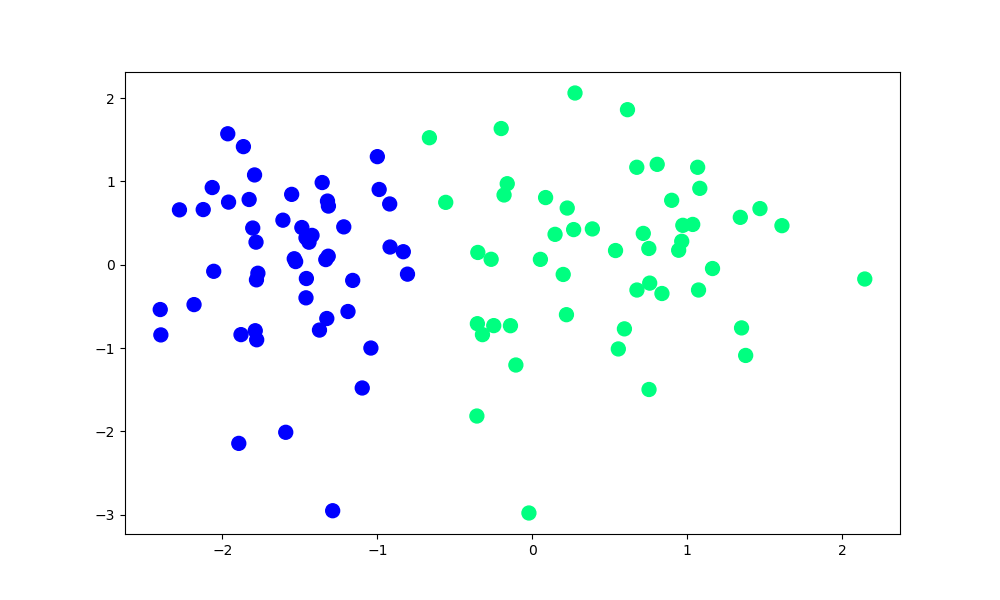

In [101]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [102]:
X.shape
# Total 100 rows and 3 columns

(100, 2)

## USING PERCEPTRON TRICK

In [103]:
# Using step function
def step(z):
    return 1 if z>0 else 0

In [104]:
def perceptron(X,y):
    
    # x ke age 1 laga dia
    X = np.insert(X,0,1,axis=1)
    # created array weight which holds value of feature as 1
    # It will create an array weights = [1,1,1] as we have 3 features only
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(1000):
        # As we have total 100 rows
        j = np.random.randint(0,100)
        # step here is a function that return 0 and 1 
        # here we calculate predicted value of y
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]- y_hat)*X[j]
        
    return weights[0],weights[1:]

In [105]:
# Example of calculating y_pred
stu = np.random.randint(0,100)
np.dot(np.insert(X[stu],0,1),[1,1,1])
# w0 * x0 + w1 * x1 + w2 * x2

2.843765513760431

In [106]:
intercept_,coef_ = perceptron(X,y)

In [107]:
print(coef_)
print(intercept_)

[1.44393343 0.15572352]
0.9


In [108]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [109]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

(-3.0, 2.0)

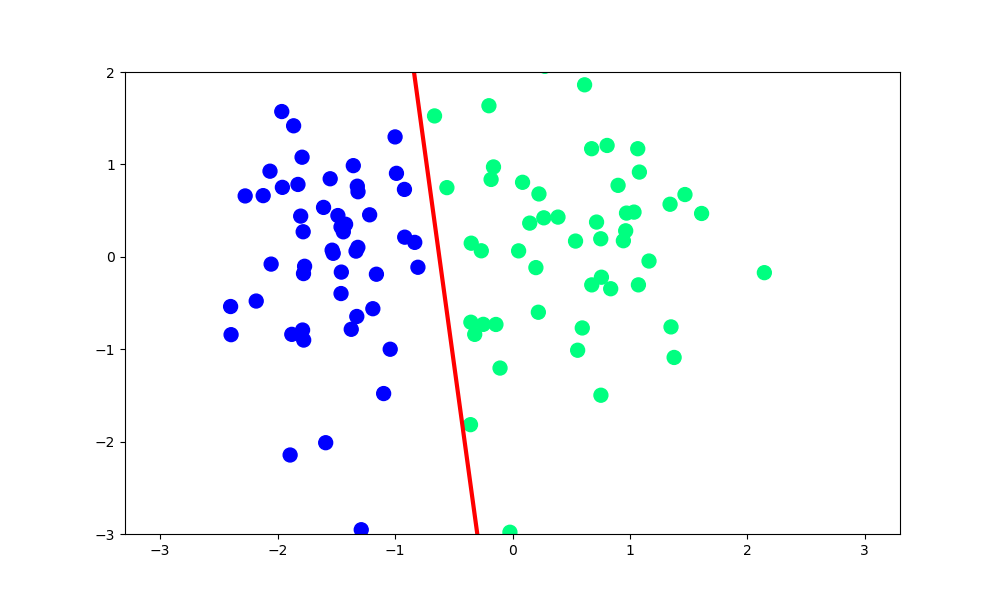

In [110]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

In [111]:
def perceptron(X,y):
    
    m = []
    b = []
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(200):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
        m.append(-(weights[1]/weights[2]))
        b.append(-(weights[0]/weights[2]))
        
    return m,b


In [112]:
m,b = perceptron(X,y)

In [113]:
%matplotlib widget
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

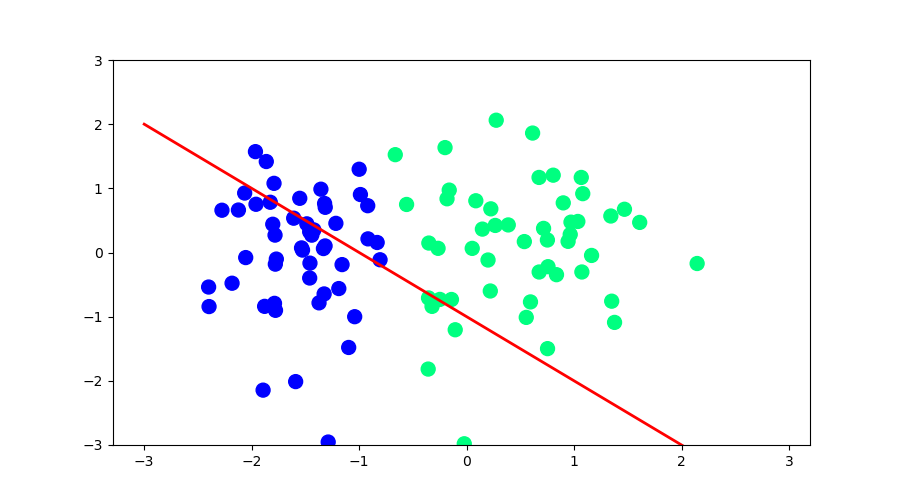

In [114]:
fig, ax = plt.subplots(figsize=(9,5))

x_i = np.arange(-3, 3, 0.1)
y_i = x_i*m[0] +b[0]
ax.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
line, = ax.plot(x_i, x_i*m[0] +b[0] , 'r-', linewidth=2)
plt.ylim(-3,3)
def update(i):
    label = 'epoch {0}'.format(i + 1)
    line.set_ydata(x_i*m[i] + b[i])
    ax.set_xlabel(label)
    # return line, ax

anim = FuncAnimation(fig, update, repeat=True, frames=200, interval=100)

## USING LOGISTIC REGRESSION

In [115]:
from sklearn.linear_model import LogisticRegression

In [116]:
lor = LogisticRegression()

In [117]:
lor.fit(X,y)

LogisticRegression()

In [118]:
m = -(lor.coef_[0][0]/lor.coef_[0][1])
b = -(lor.intercept_[0]/lor.coef_[0][1])

In [119]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input + b

(-3.0, 2.0)

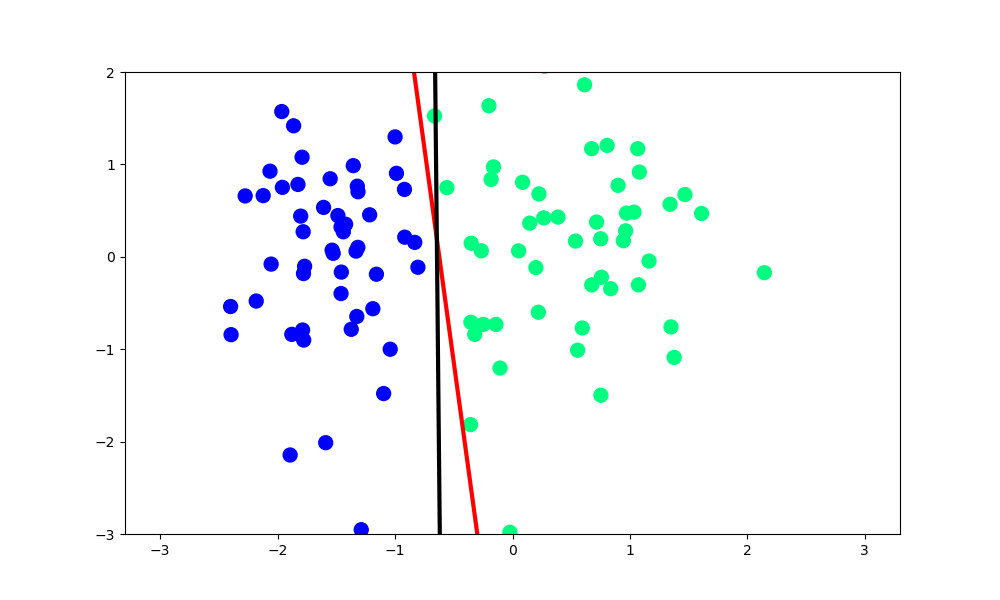

In [120]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

### Insights:
- Logistic Regression model is giving way better result than Perceptron model
- Perceptron model will stop after it start getting true answer whereas Logistic Regression model will keep on learning and improving
- Logistic Regression model is dividing data more symmetrically

## USING SIGMOID FUNCTION

In [122]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [123]:
def perceptron(X,y):
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = sigmoid(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
    return weights[0],weights[1:]

In [124]:
intercept_,coef_ = perceptron(X,y)

In [125]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [126]:
x_input2 = np.linspace(-3,3,100)
y_input2 = m*x_input + b

(-3.0, 2.0)

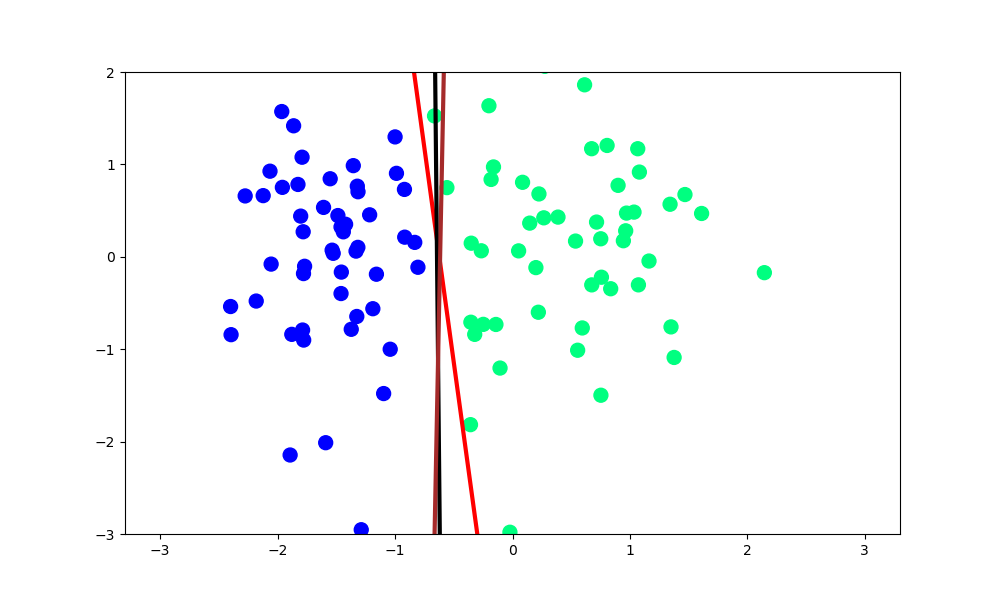

In [127]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.plot(x_input2,y_input2,color='brown',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)


### Insight:
- We can see that there is improvement in line when we use sigmoid function
- But still the line is not accurate as compared to Logistic Regression